# Morfologia Matemática em Processamento Digital de Imagens

A morfologia matemática é um conjunto de operações baseadas na teoria de conjuntos que analisa e processa imagens digitais. Ela é utilizada primariamente em imagens binárias. Essas operações ajudam a explorar formas, estruturas e padrões presentes nas imagens, sendo amplamente usadas em tarefas como segmentação, análise de formas e remoção de ruídos.

## Descrição

A morfologia utiliza um objeto chamado elemento estruturante, que é uma matriz pequena usada para interagir com a imagem. Esse elemento estruturante define:

**Tamanho:** A área da vizinhança a ser analisada.

**Forma:** Pode ser quadrada, circular, ou outra, dependendo da aplicação.

- **Operações morfológicas**

    Operações que consistem em centralizar o elemento estruturante a todos os pixels da imagem e verificar para cada pixel se o elemnte estruturante faz intersecção com qualquer outro pixel, e se fizer realizar uma operação conforme 

    - **Erosão**

        Remove pixels das bordas de objetos, o que resulta em uma redução no tamanho das regiões brancas.
        
        Útil para remover pequenos objetos ou ruídos e destacar estruturas finas.

        Definição:
        
        ```math
        A \ominus B = \{ z \in E \mid B_z \subseteq A \}
        ```

    - **Dilatação**

        Adiciona pixels às bordas de objetos, o que resulta em um aumento do tamanho das regiões brancas.

        Útil para conectar componentes desconectados e preencher buracos pequenos.

        Definição:

        ```math
        A \oplus B = \{ z \in E \mid B_z \cap A \neq \emptyset \}
        ```

    - **Abertura**

        Combina erosão seguida de dilatação, Remove objetos pequenos enquanto preserva as formas maiores.
        
        Útil para suavizar contornos e eliminar ruídos pequenos.

        **Erosão > Dilatação**
        

    - **Fechamento**

        Combina dilatação seguida de erosão, preenche pequenos buracos ou lacunas nas bordas.
        
        Útil para preservar formas grandes e eliminar buracos internos.

        **Dilatação > Erosão**

## Código

- **Operações Morfológicas:**

    - **Erosão**

        Realiza a erosão usando um elemento estruturante

        ```python
        def erosao(imagem, elemento_estruturante):
            imagem = threshold(imagem)

            img = np.array(imagem) // 255

            ee = np.array(elemento_estruturante)

            img_edit = np.zeros(img.shape)

            ee_h, ee_w = ee.shape
            pad_h, pad_w = ee_h // 2, ee_w // 2

            padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

            for i in range(pad_h, padded_img.shape[0] - pad_h):
                for j in range(pad_w, padded_img.shape[1] - pad_w):
                    if np.array_equal(padded_img[i-pad_h:i+pad_h+1, j-pad_w:j+pad_w+1], ee):
                        img_edit[i-pad_h, j-pad_w] = 1

            return Image.fromarray((img_edit * 255).astype(np.uint8))
        ```

    - **Dilatacão**
    
        Realiza a dilatação usando um elemento estruturante

        ```python
        def dilatacao(imagem, elemento_estruturante):
            imagem = threshold(imagem)

            img = np.array(imagem) // 255

            ee = np.array(elemento_estruturante)

            img_edit = np.zeros(img.shape)

            ee_h, ee_w = ee.shape
            pad_h, pad_w = ee_h // 2, ee_w // 2

            padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

            for i in range(pad_h, padded_img.shape[0] - pad_h):
                for j in range(pad_w, padded_img.shape[1] - pad_w):
                    if np.any(padded_img[i-pad_h:i+pad_h+1, j-pad_w:j+pad_w+1].astype(int) & ee.astype(int)):
                        img_edit[i-pad_h, j-pad_w] = 1
                        
            return Image.fromarray((img_edit * 255).astype(np.uint8))
        ```

    - **Abertura**

        Combina erosão seguida de dilatação

        ```python
        def abertura(imagem, elemento_estruturante):
            return dilatacao(erosao(imagem, elemento_estruturante), elemento_estruturante)
        ```

    - **Fechamento**

        Combina dilatação seguida de erosão

        ```python
        def fechamento(imagem, elemento_estruturante):
            return erosao(dilatacao(imagem, elemento_estruturante), elemento_estruturante)
        ```

- **Elemento estruturantes utilizados**

    - **Cruz 3x3**

        ```python
        cruz3x3 = np.array([[0, 1, 0],
                            [1, 1, 1],
                            [0, 1, 0]])
        ```

    - **Cruz 7x7**

        ```python
        cruz7x7 = np.array([[0, 0, 0, 1, 0, 0, 0],
                            [0, 0, 1, 1, 1, 0, 0],
                            [0, 1, 1, 1, 1, 1, 0],
                            [1, 1, 1, 1, 1, 1, 1],
                            [0, 1, 1, 1, 1, 1, 0],
                            [0, 0, 1, 1, 1, 0, 0],
                            [0, 0, 0, 1, 0, 0, 0]])
        ```

    - **Linha 1x7**

        ```python
        linha7 = np.array([[1], [1], [1], [1], [1], [1], [1]])
        ```

    - **Quadrado 3x3**

        ```python
        quadrado3x3 = np.array([[1, 1, 1],
                                [1, 1, 1],
                                [1, 1, 1]])
        ```

### Codigo final

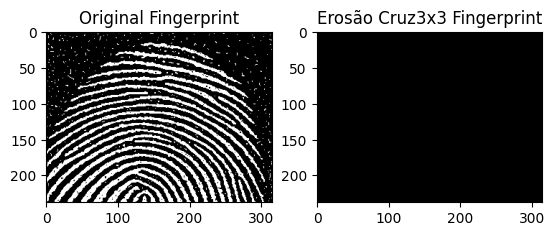

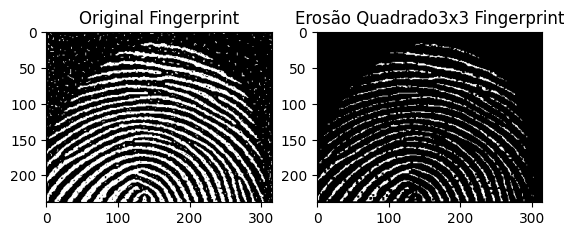

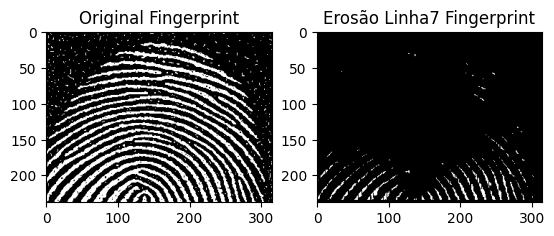

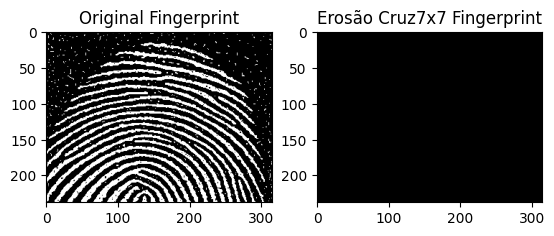

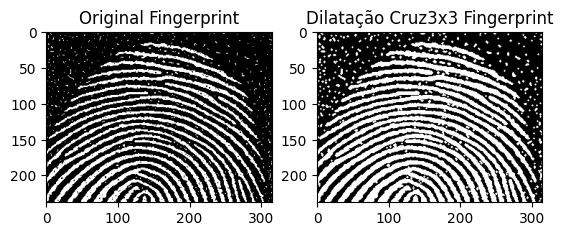

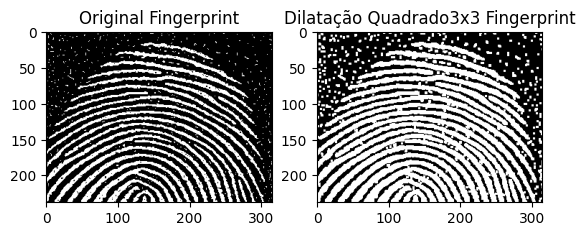

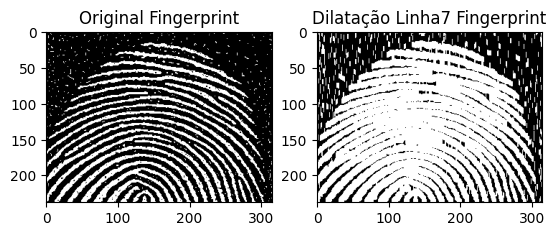

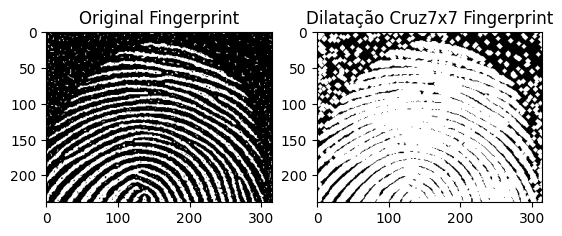

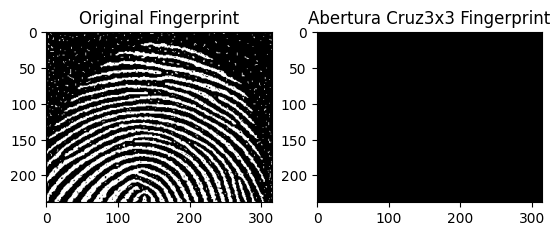

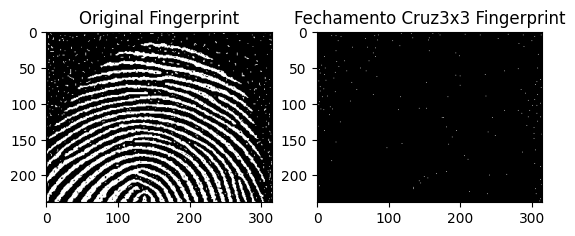

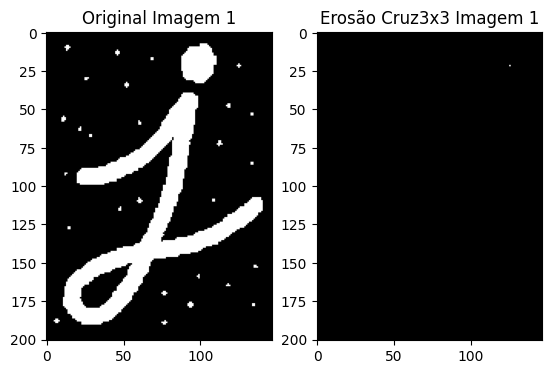

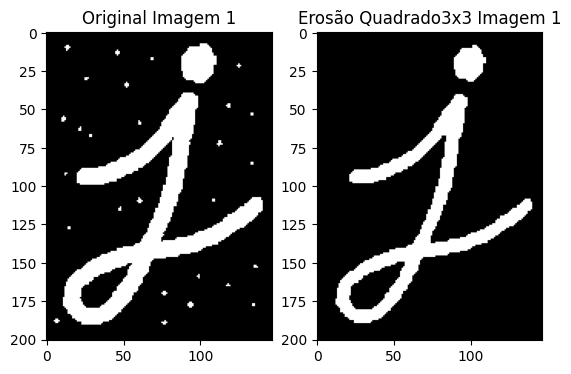

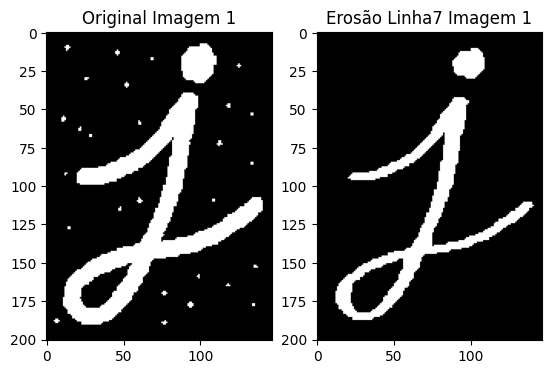

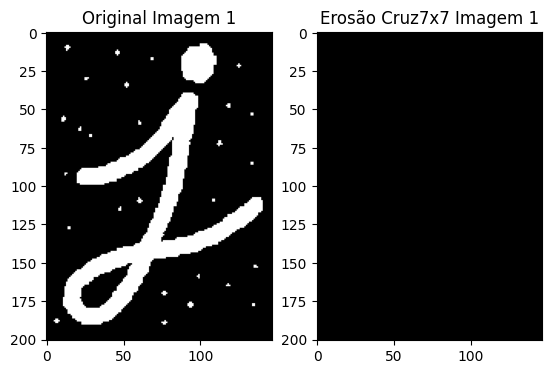

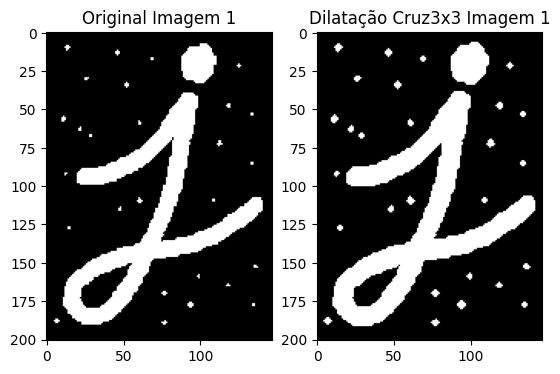

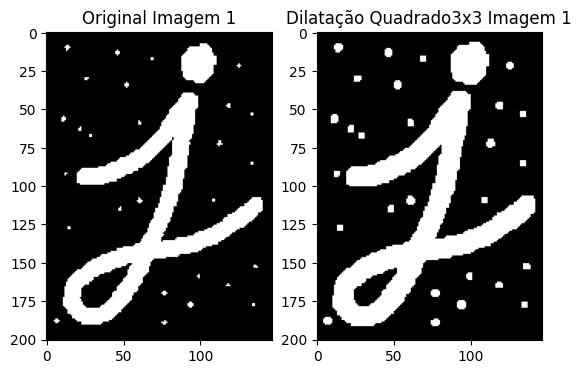

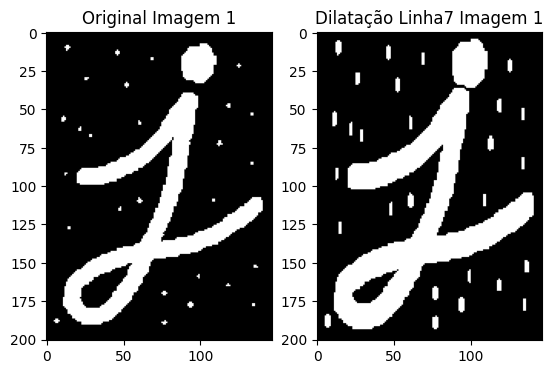

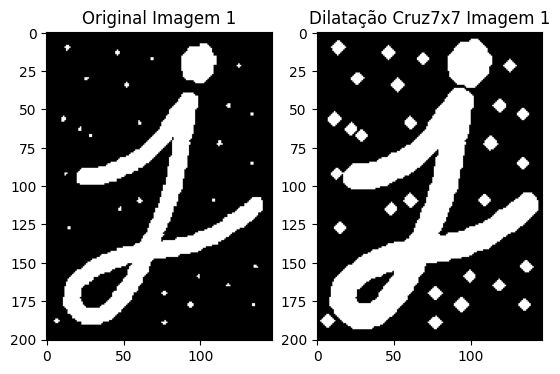

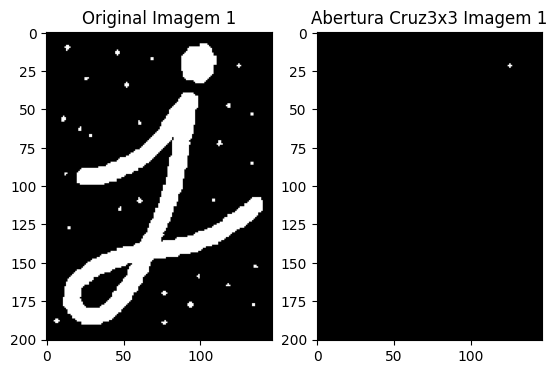

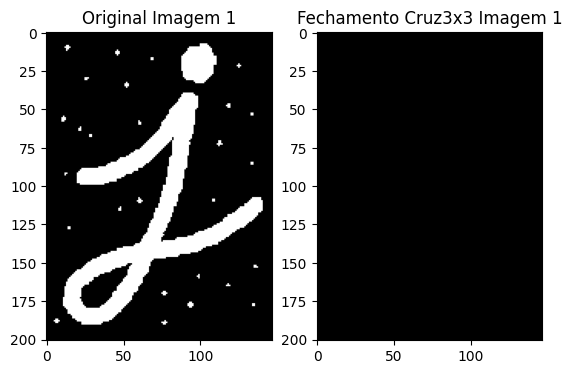

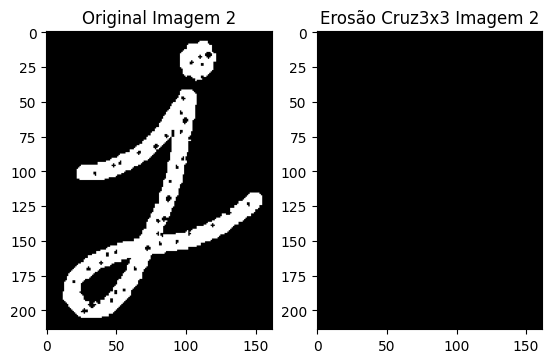

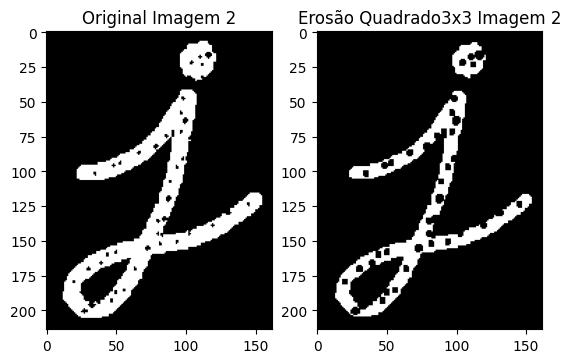

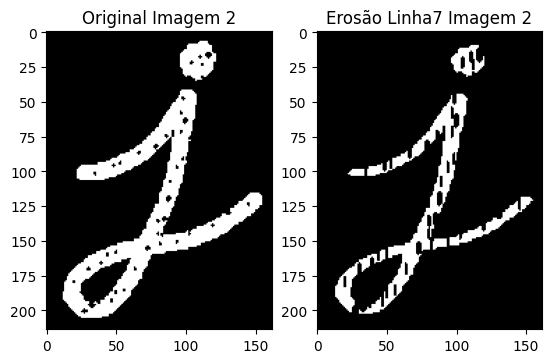

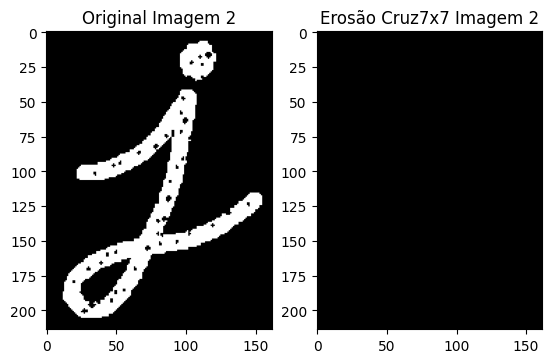

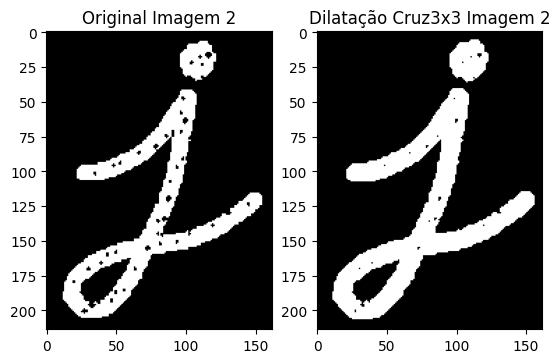

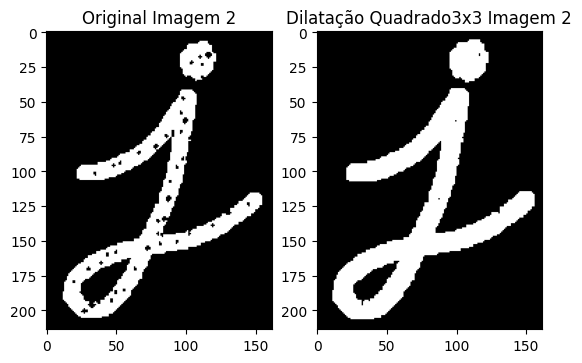

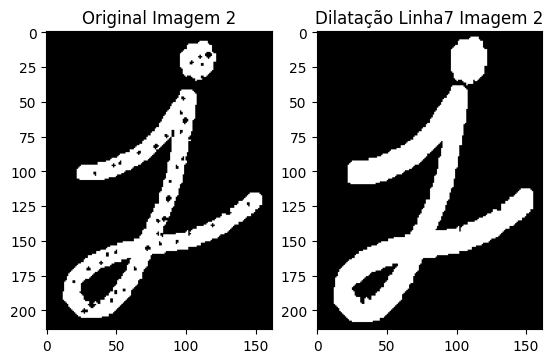

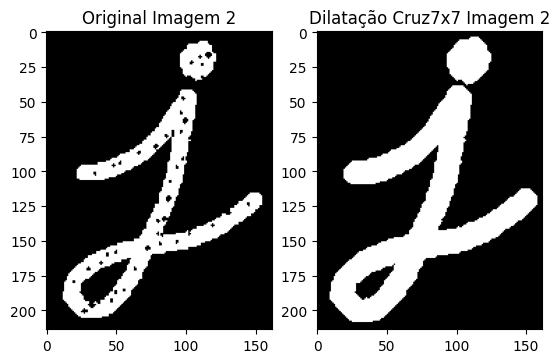

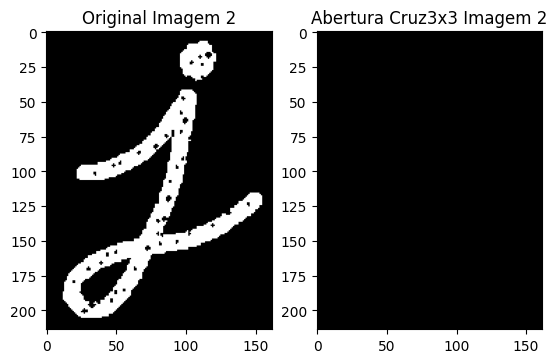

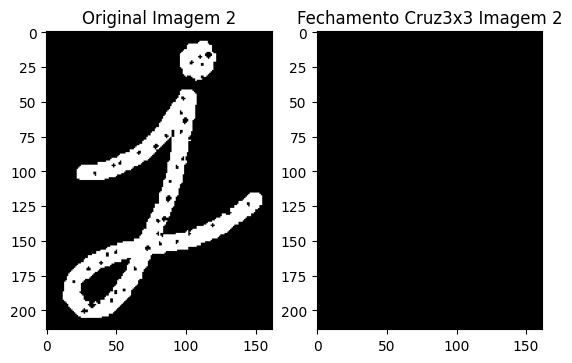

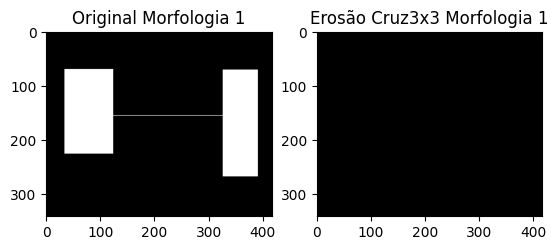

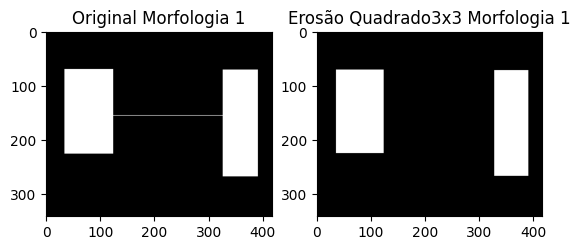

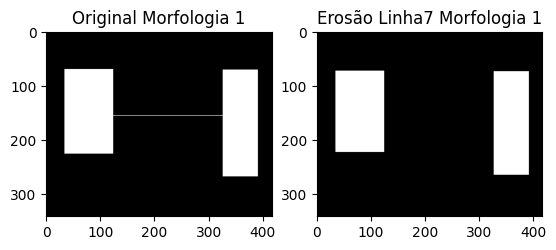

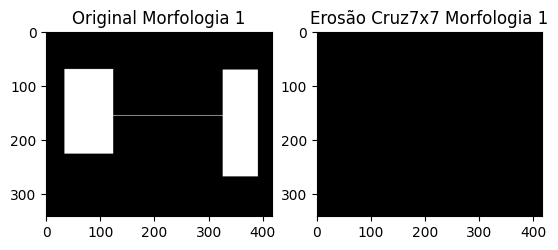

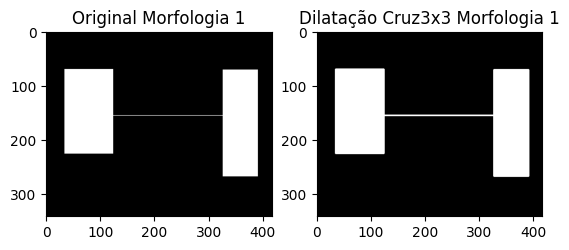

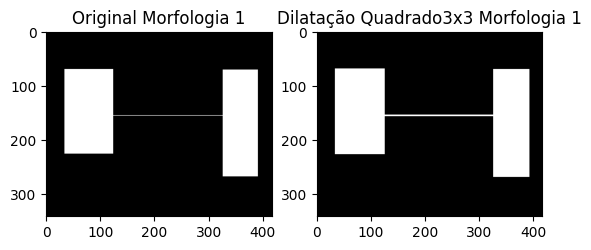

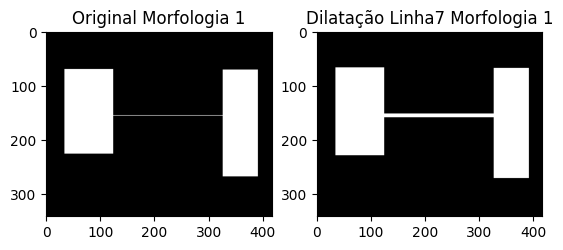

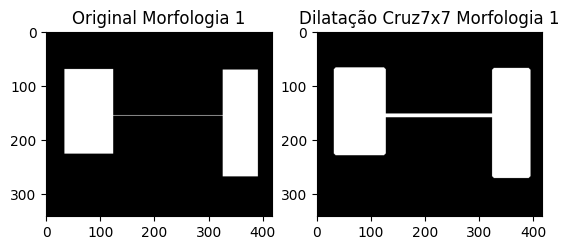

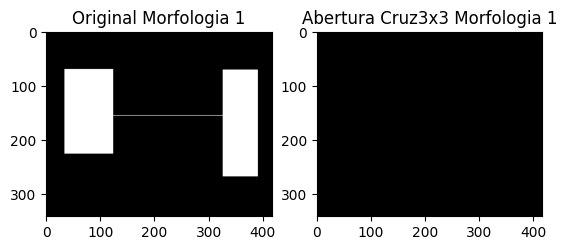

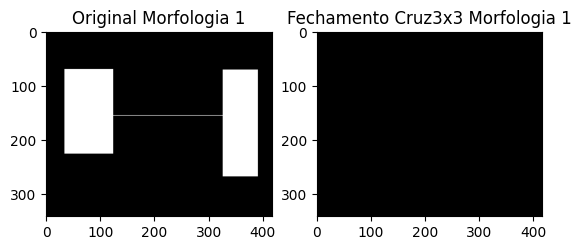

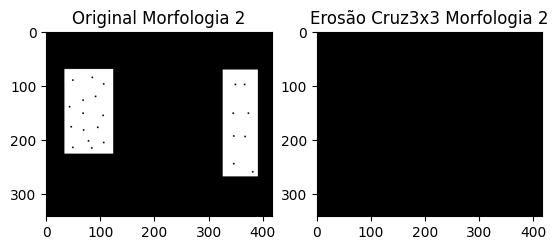

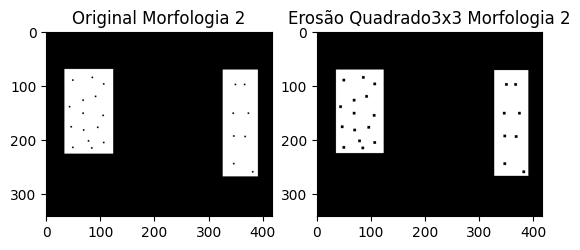

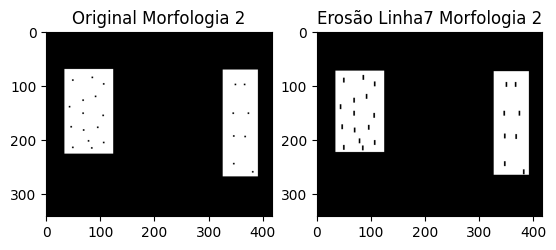

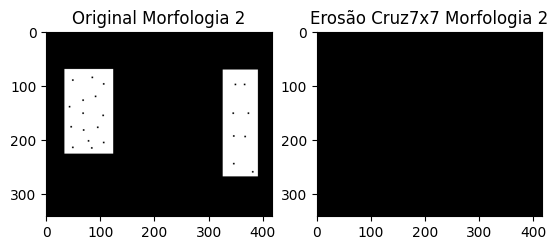

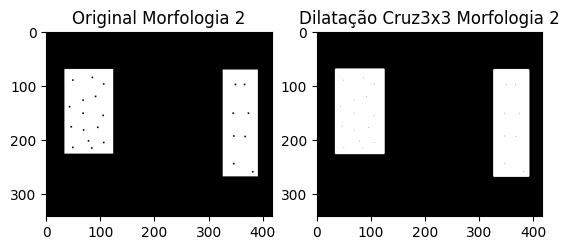

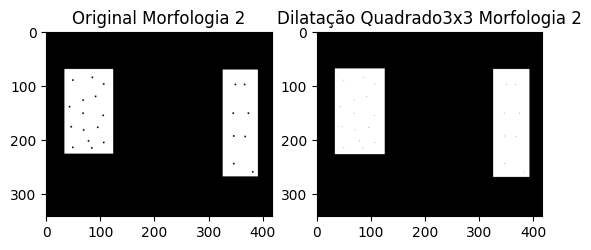

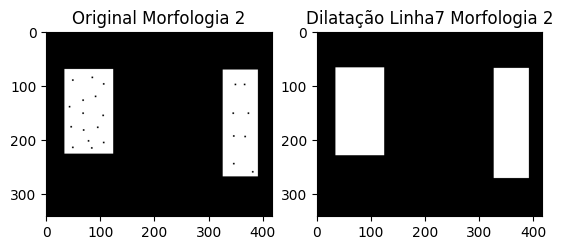

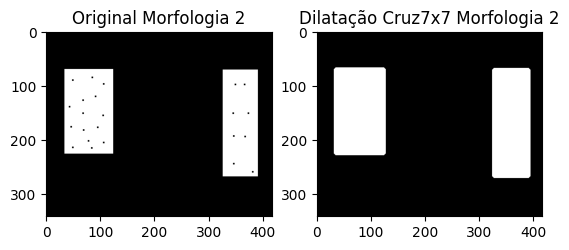

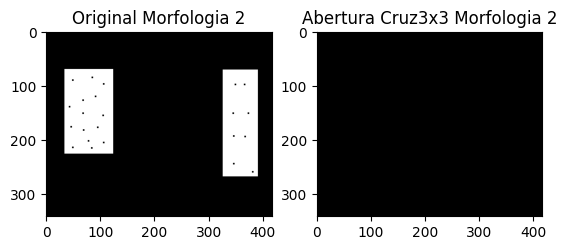

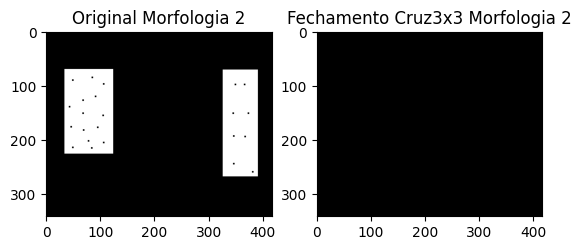

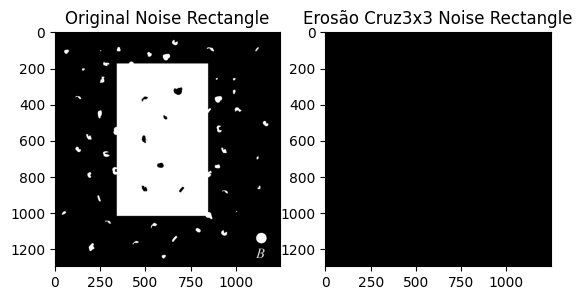

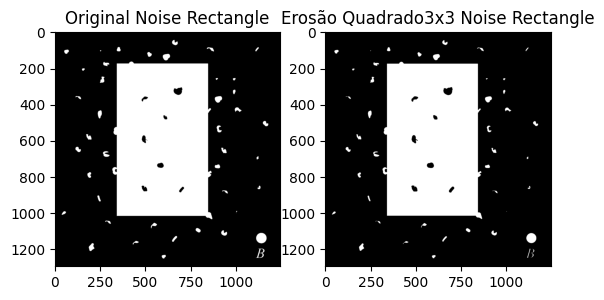

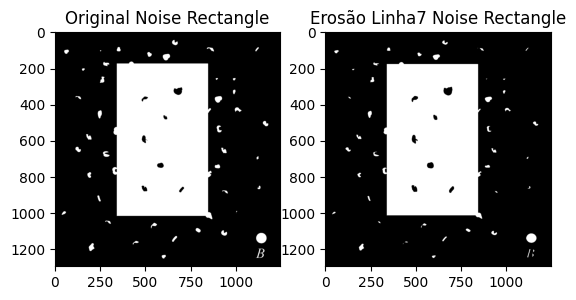

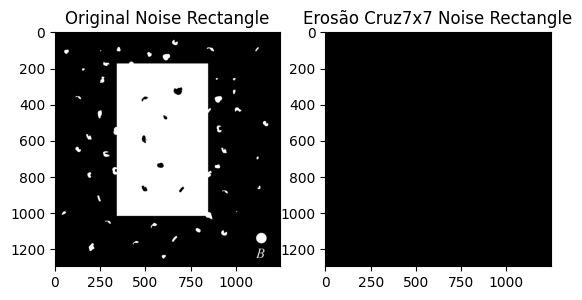

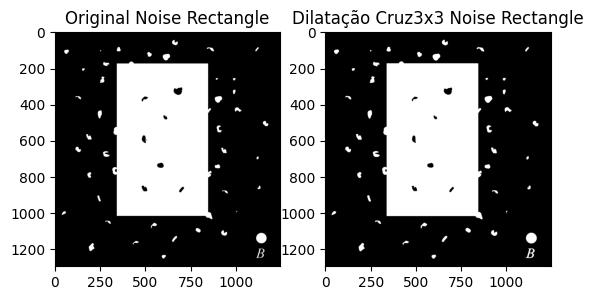

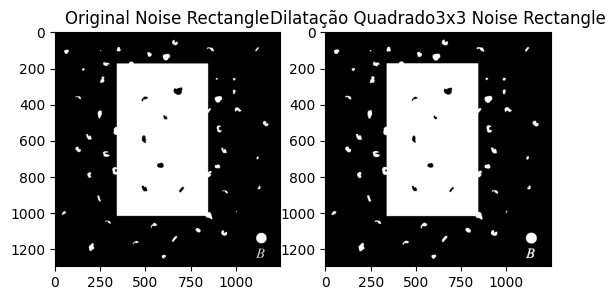

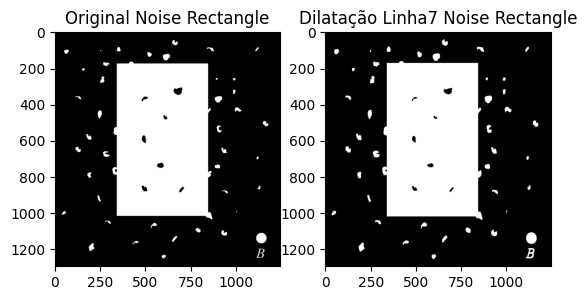

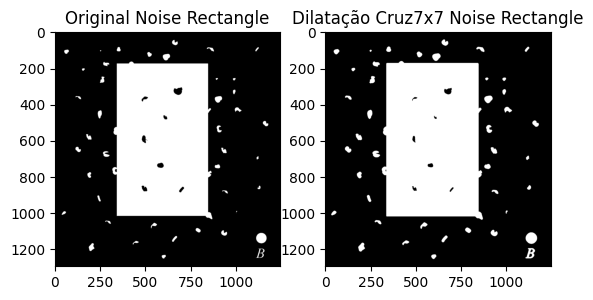

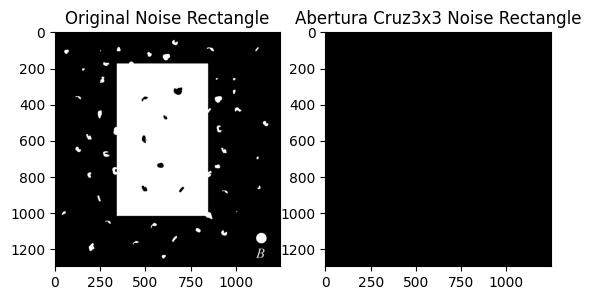

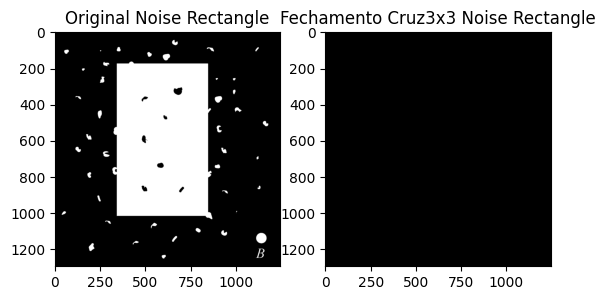

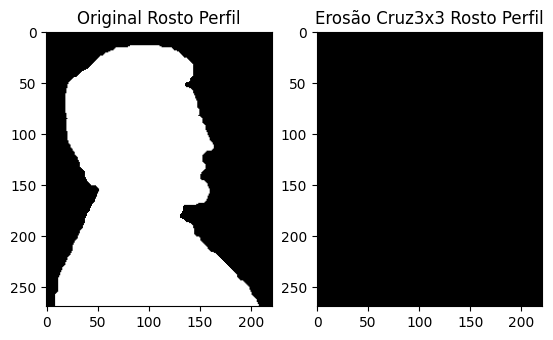

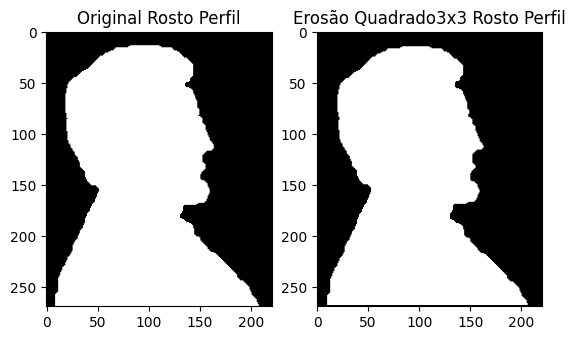

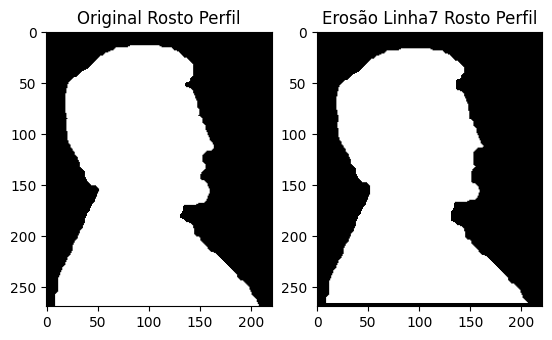

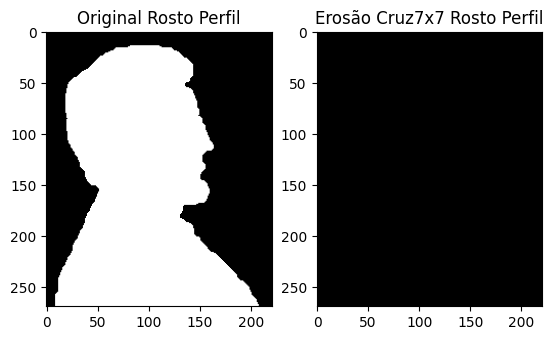

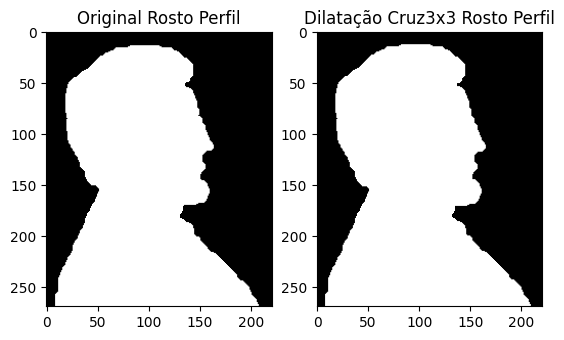

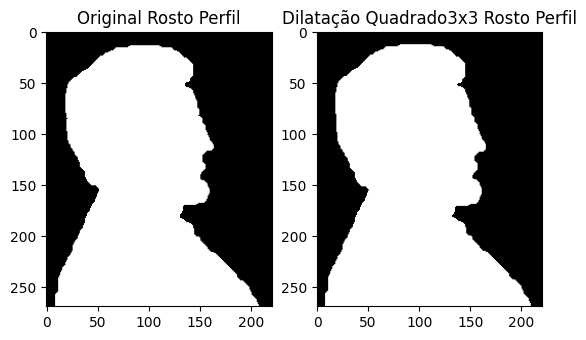

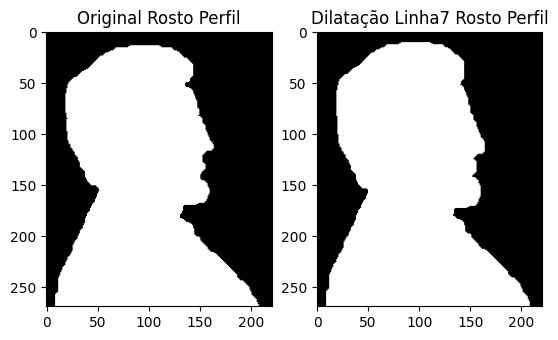

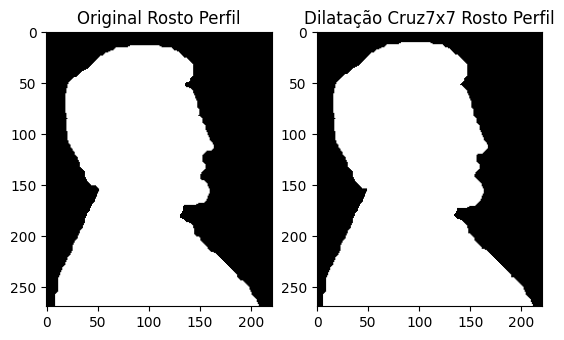

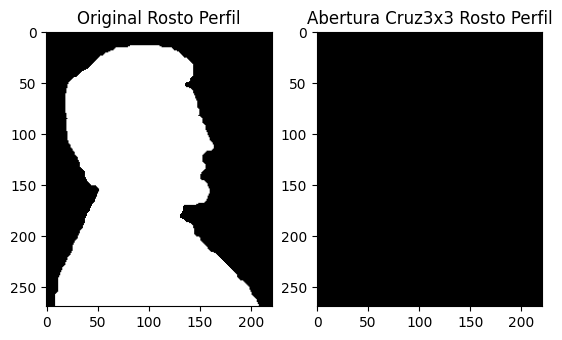

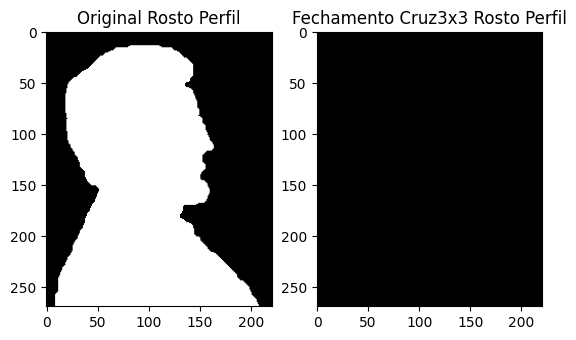

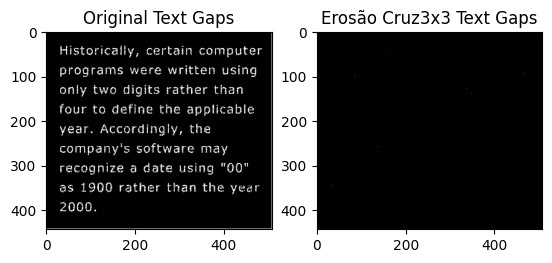

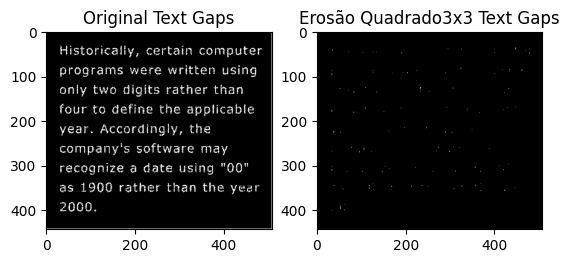

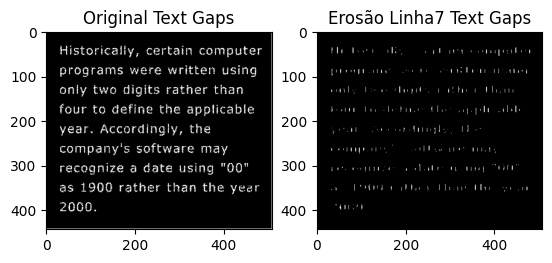

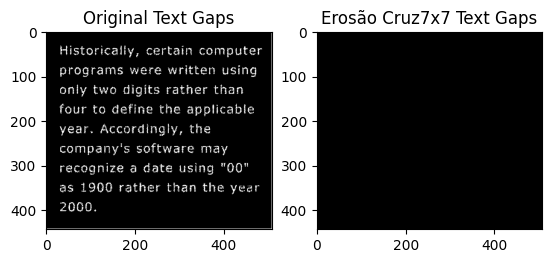

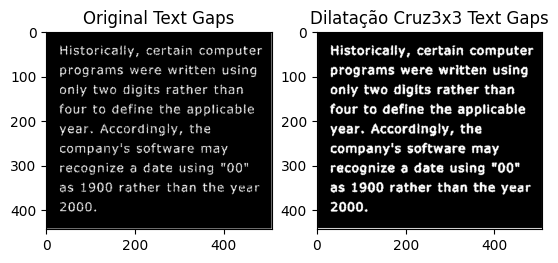

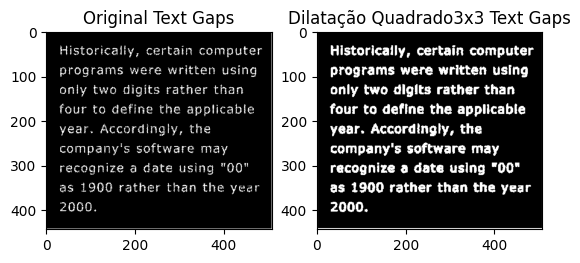

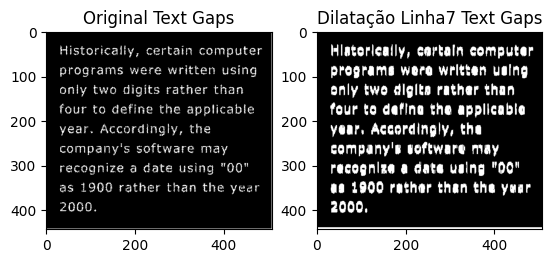

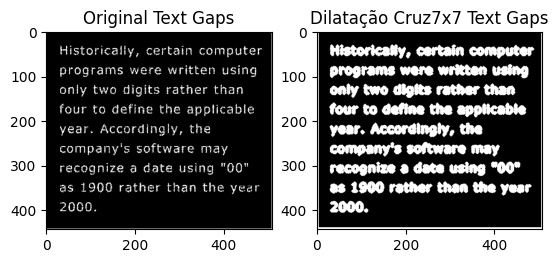

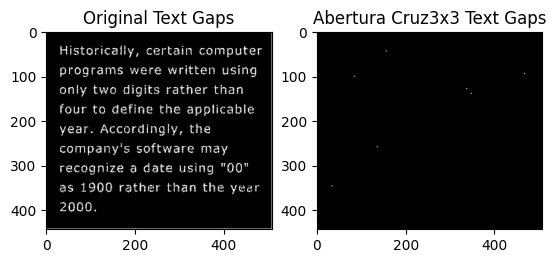

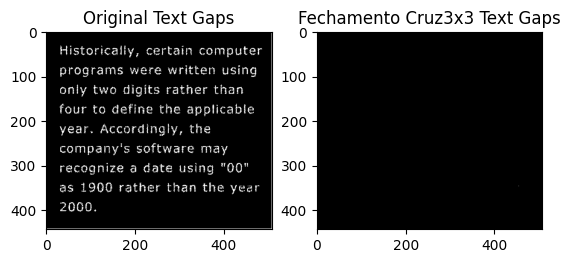

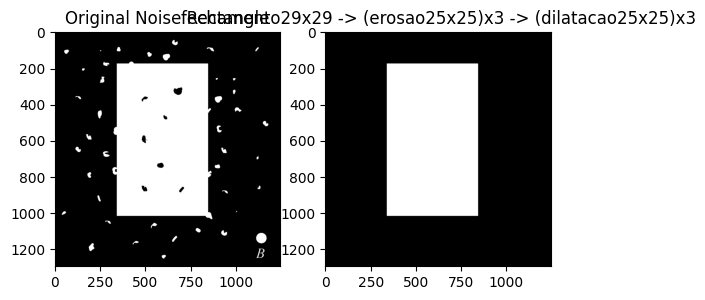

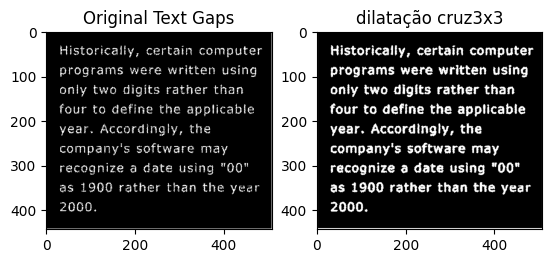

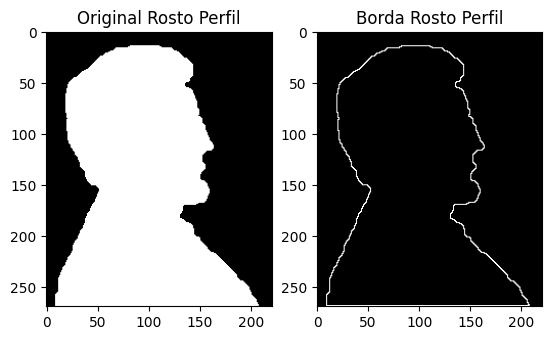

In [1]:
import datetime
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import scipy
import cv2

def plot(img, edit, txt1, txt2):
    fig, ax = plt.subplots(nrows=1, ncols=2)
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title(txt1)
    ax[1].imshow(edit, cmap='gray')
    ax[1].set_title(txt2)
    plt.show()

def salvar(imagem, nome):
    print("Desenha salvar a imagem? (s/N)")
    entrada = input()
    if entrada == "s":
        time = datetime.datetime.now().strftime("%Y-%m-%d")
        imagem.save(f'imgs/{nome}{time}.png')

def gerarElementoEstruturanteQuadrado(tamanho):
    return np.ones((tamanho, tamanho), dtype=int)

def threshold(imagem, limiar=128):
    img = np.array(imagem.convert('L'))
    img_bin = (img > limiar).astype(np.uint8)
    return Image.fromarray(img_bin * 255)

def erosao(imagem, elemento_estruturante):
    imagem = threshold(imagem)
    img = np.array(imagem) // 255
    ee = np.array(elemento_estruturante)
    img_edit = np.zeros(img.shape)
    ee_h, ee_w = ee.shape
    pad_h, pad_w = ee_h // 2, ee_w // 2
    padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    for i in range(pad_h, padded_img.shape[0] - pad_h):
        for j in range(pad_w, padded_img.shape[1] - pad_w):
            if np.array_equal(padded_img[i-pad_h:i+pad_h+1, j-pad_w:j+pad_w+1], ee):
                img_edit[i-pad_h, j-pad_w] = 1
    return Image.fromarray((img_edit * 255).astype(np.uint8))

def dilatacao(imagem, elemento_estruturante):
    imagem = threshold(imagem)
    img = np.array(imagem) // 255
    ee = np.array(elemento_estruturante)
    img_edit = np.zeros(img.shape)
    ee_h, ee_w = ee.shape
    pad_h, pad_w = ee_h // 2, ee_w // 2
    padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    for i in range(pad_h, padded_img.shape[0] - pad_h):
        for j in range(pad_w, padded_img.shape[1] - pad_w):
            if np.any(padded_img[i-pad_h:i+pad_h+1, j-pad_w:j+pad_w+1].astype(int) & ee.astype(int)):
                img_edit[i-pad_h, j-pad_w] = 1
    return Image.fromarray((img_edit * 255).astype(np.uint8))

def variasErosoes(imagem, elemento_estruturante, n):
    for i in range(n):
        imagem = erosao(imagem, elemento_estruturante)
    return imagem

def variasDilatacoes(imagem, elemento_estruturante, n):
    for i in range(n):
        imagem = dilatacao(imagem, elemento_estruturante)
    return imagem

def abertura(imagem, elemento_estruturante):
    return dilatacao(erosao(imagem, elemento_estruturante), elemento_estruturante)

def fechamento(imagem, elemento_estruturante):
    return erosao(dilatacao(imagem, elemento_estruturante), elemento_estruturante)

def main():

  cruz3x3 = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
  quadrado3x3 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
  linha7 = np.array([[1], [1], [1], [1], [1], [1], [1]])
  cruz7x7 = np.array([[0, 0, 0, 1, 0, 0, 0], [0, 0, 1, 1, 1, 0, 0], [0, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1], [0, 1, 1, 1, 1, 1, 0], [0, 0, 1, 1, 1, 0, 0], [0, 0, 0, 1, 0, 0, 0]])

  fingerprint = Image.open('imgs/fingerprint.tif') 
  imagem1 = Image.open('imgs/Imagem1.tif') 
  imagem2 = Image.open('imgs/Imagem2.tif') 
  morfologia1 = Image.open('imgs/morfologia1.tif') 
  morfologia2 = Image.open('imgs/morfologia2.tif') 
  noiseRectangle = Image.open('imgs/noise_rectangle.tif') #f
  rostoPerfil = Image.open('imgs/rosto_perfil.tif') #h
  textGaps = Image.open('imgs/text_gaps.tif') #g

  imgs = [fingerprint, imagem1, imagem2, morfologia1, morfologia2, noiseRectangle, rostoPerfil, textGaps]
  texts = ['Fingerprint', 'Imagem 1', 'Imagem 2', 'Morfologia 1', 'Morfologia 2', 'Noise Rectangle', 'Rosto Perfil', 'Text Gaps']

  for i in range(len(imgs)):
    # 1) Erosão e Dilatação
    plot(imgs[i], erosao(imgs[i], cruz3x3), "Original "+texts[i], "Erosão Cruz3x3 "+texts[i])
    plot(imgs[i], erosao(imgs[i], quadrado3x3), "Original "+texts[i], "Erosão Quadrado3x3 "+texts[i])
    plot(imgs[i], erosao(imgs[i], linha7), "Original "+texts[i], "Erosão Linha7 "+texts[i])
    plot(imgs[i], erosao(imgs[i], cruz7x7), "Original "+texts[i], "Erosão Cruz7x7 "+texts[i])

    plot(imgs[i], dilatacao(imgs[i], cruz3x3), "Original "+texts[i], "Dilatação Cruz3x3 "+texts[i])
    plot(imgs[i], dilatacao(imgs[i], quadrado3x3), "Original "+texts[i], "Dilatação Quadrado3x3 "+texts[i])
    plot(imgs[i], dilatacao(imgs[i], linha7), "Original "+texts[i], "Dilatação Linha7 "+texts[i])
    plot(imgs[i], dilatacao(imgs[i], cruz7x7), "Original "+texts[i], "Dilatação Cruz7x7 "+texts[i])

    # 2) Abertura e Fechamento
    plot(imgs[i], abertura(imgs[i], cruz3x3), "Original "+texts[i], "Abertura Cruz3x3 "+texts[i])

    plot(imgs[i], fechamento(imgs[i], cruz3x3), "Original "+texts[i], "Fechamento Cruz3x3 "+texts[i])
    # a) Abertura
    # b) Abertura
    # c) Fechamento
    # d) Abertura
    # e) Fechamento
    
  # 3)Qual sequência de operações poderia ser realizadas para que a imagem f) ficasse apenas com um retângulo branco ao centro?
  quadrado29x29 = gerarElementoEstruturanteQuadrado(29)
  quadrado25x25 = gerarElementoEstruturanteQuadrado(25)
  plot(noiseRectangle, variasDilatacoes(variasErosoes(fechamento(noiseRectangle, quadrado29x29), quadrado25x25,3), quadrado25x25, 3), "Original Noise Rectangle", "fechamento29x29 -> (erosao25x25)x3 -> (dilatacao25x25)x3")
  
  # 4)Qual(is) operações seriam necessárias para melhorar a imagem g)?
  plot(textGaps, dilatacao(textGaps, cruz3x3), "Original Text Gaps", "dilatação cruz3x3")

  # 5)Quais operações seriam necessárias para extrair apenas a borda da imagem h)?
  borda = Image.fromarray(np.array(rostoPerfil) - np.array(erosao(rostoPerfil, quadrado3x3)))
  plot(rostoPerfil, borda, "Original Rosto Perfil", "Borda Rosto Perfil")

if __name__ == "__main__":
    main()
